In [13]:
from opyenxes.model.XLog import XLog
from opyenxes.data_in.XUniversalParser import XUniversalParser
from opyenxes.classification.XEventAttributeClassifier import XEventAttributeClassifier
from bokeh.plotting import figure, output_file, show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
bpic_2011_path = "master-thesis/logs/bpic2011.xes"

with open(bpic_2011_path) as bpic2011_file:
    bpic2011_rlog = XUniversalParser().parse(bpic2011_file)

Unknown extension: http://www.xes-standard.org/meta_time.xesext
Unknown extension: http://www.xes-standard.org/meta_life.xesext
Unknown extension: http://www.xes-standard.org/meta_org.xesext
Unknown extension: http://www.xes-standard.org/meta_concept.xesext
Unknown extension: http://www.xes-standard.org/meta_3TU.xesext
Unknown extension: http://www.xes-standard.org/meta_general.xesext


In [24]:
bpic2011_log = bpic2011_rlog[0] # the rest of this array is empty anyway as len(bpic2011_rlog) == 1
raw_trace = bpic2011_log[0]
raw_event = raw_trace[0]
raw_attributes = raw_event.get_attributes()

## Attributes of the first event of the first trace

In [16]:
for attribute in raw_attributes:
    attribute = raw_attributes[attribute]
    print(attribute.get_key(), "=", attribute.get_value())

org:group = Radiotherapy
Number of executions = 1
Specialism code = 61
concept:name = 1e consult poliklinisch
Producer code = SRTH
Section = Section 5
Activity code = 410100
time:timestamp = 2005-01-03 00:00:00+01:00
lifecycle:transition = complete


## All attributes of the first trace and their occurence along it

In [17]:
# collect all attributes
attribute_list = []

for event in raw_trace:
    event_attributes = event.get_attributes()
    
    for attribute in event_attributes:
        attribute_list.append(attribute)
        
attribute_list = set(attribute_list) # remove duplicates

event_indices = range(0,len(raw_trace))
attribute_labels = attribute_list
attribute_dict = {attr:[] for attr in attribute_list}

trace_df = pd.DataFrame(columns=attribute_labels, index=event_indices)

for event_idx,event in enumerate(raw_trace):
    event_attributes = event.get_attributes()
    for attribute in event_attributes:
        trace_df.iloc[event_idx][attribute] = event_attributes[attribute].get_value()

In [18]:
trace_df

,org:group,Number of executions,lifecycle:transition,Specialism code,Producer code,time:timestamp,Section,Activity code,concept:name
0,Radiotherapy,1,complete,61,SRTH,2005-01-03 00:00:00+01:00,Section 5,410100,1e consult poliklinisch
1,Radiotherapy,1,complete,61,SRTH,2005-01-03 00:00:00+01:00,Section 5,419100,administratief tarief - eerste pol
2,Nursing ward,1,complete,7,SGEH,2005-01-05 00:00:00+01:00,Section 2,10107,verlosk.-gynaec. korte kaart kosten-out
3,Obstetrics & Gynaecology clinic,1,complete,7,SGEC,2005-01-05 00:00:00+01:00,Section 2,339486E,echografie - genitalia interna
4,Nursing ward,1,complete,7,SGEH,2005-01-05 00:00:00+01:00,Section 2,410100,1e consult poliklinisch
5,Nursing ward,1,complete,7,SGEH,2005-01-05 00:00:00+01:00,Section 2,419100,administratief tarief - eerste pol
6,Radiotherapy,1,complete,61,RATH,2005-01-24 00:00:00+01:00,Section 5,390520,simulator - gebruik voor aanvang megavol
7,Radiotherapy,1,complete,61,RATH,2005-01-31 00:00:00+01:00,Section 5,390003,behandeltijd - eenheid t3 - megavolt
8,Radiotherapy,1,complete,61,RATH,2005-01-31 00:00:00+01:00,Section 5,390550,teletherapie - megavolt fotonen bestrali
9,General Lab Clinical Chemistry,1,complete,86,CRLA,2005-02-15 00:00:00+01:00,Section 4,370000,aanname laboratoriumonderzoek


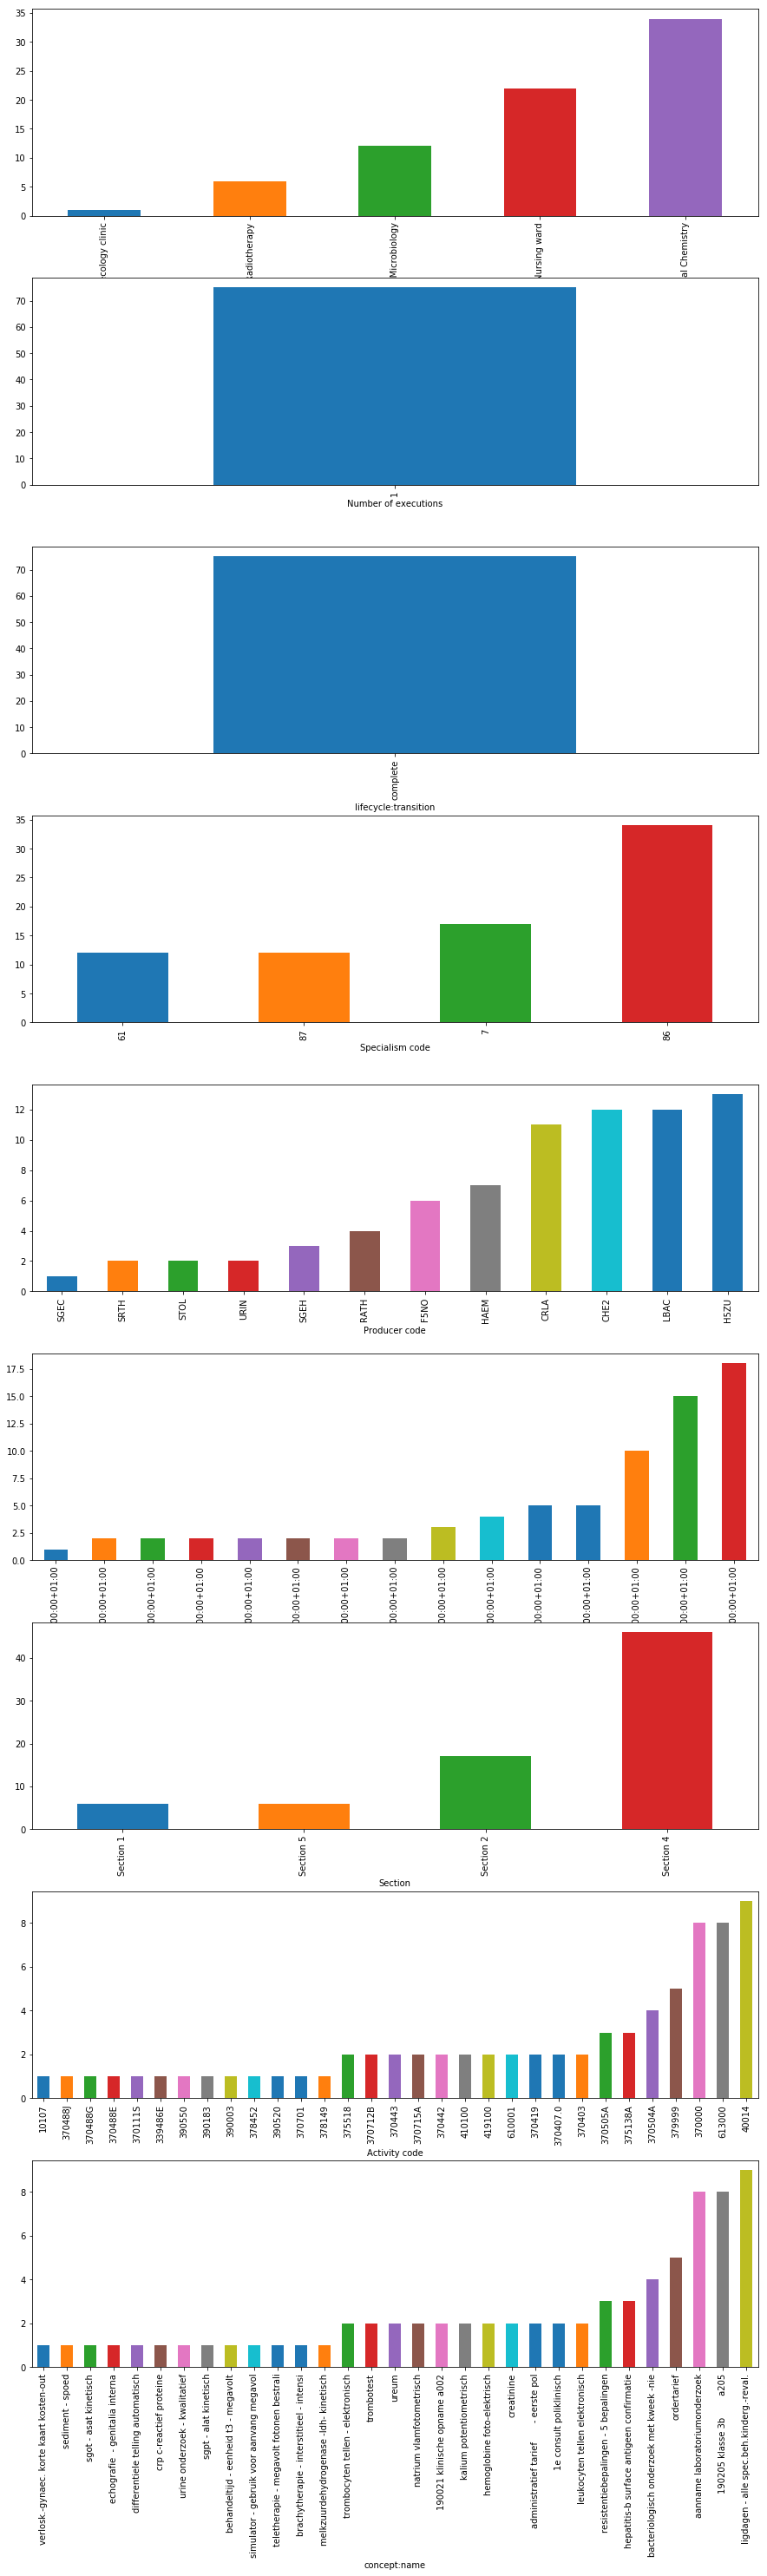

In [19]:
fig, axs = plt.subplots(9,1, figsize=(15,50))

for idx, attr in enumerate(attribute_list):
    trace_df.groupby(attr).size().sort_values().plot(kind='bar', ax=axs[idx])
    
#fig.tight_layout()
fig.subplots_adjust(hspace=0.3)